# Математический анализ в контексте задачи оптимизации. Часть 2

## Частные производные
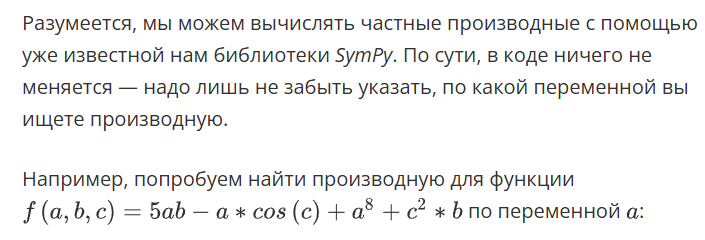

In [2]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**8 + c**2*b
print(diff(f, a))

8*a**7 + 5*b - cos(c)


### Задание 2.2
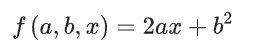

In [4]:
from sympy import symbols, cos, diff

a, b, x = symbols('a b x', real=True)
f = 2*a*x + b**2
print(diff(f, a))
print(diff(f, a, 2))

2*x
0


### Задание 2.4
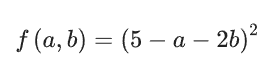

In [6]:
from sympy import symbols, cos, diff

a, b, x = symbols('a b x', real=True)
f_1 = (5-a-2*b)**2
f_2 = (a+2*b-5)**2
print(diff(f_1, a))
print(diff(f_1, b))
print(diff(f_2, a))
print(diff(f_2, b))

2*a + 4*b - 10
4*a + 8*b - 20
2*a + 4*b - 10
4*a + 8*b - 20


### Задание 2.6
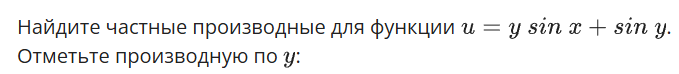

In [7]:
from sympy import symbols, sin, diff

x, y = symbols('x y', real=True)
f = y*sin(x)+sin(y)
print(diff(f, x))
print(diff(f, y))

y*cos(x)
sin(x) + cos(y)
